# ✅ Data Mining HW02 (231030)

- [과제 수행 내용] 네트워크 분석 논문을 바탕으로 직접 실습해보기
- [데이터] K-POP 팬덤 데이터
- [제출파일]: 해당 파일 내 코드 및 답변을 추가한 ipynb 파일 (hw02_answer_학번+이름.ipynb)
- [제출기한] 11월 05일 (일) 자정 (23:59까지)
- [유의사항]
  1. 제출 파일 형식에 맞춰 결과물을 정확히 제출할 것.
  2. 제출 기한을 엄수할 것.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---


#  📚 Alliance for My idol: Analyzing the K-pop fandom collaboration network.
Kang, Jiwon, et al. Extended abstracts of the 2019 CHI conference on human factors in computing systems. 2019.

- K-POP 팬덤 간의 상호작용(협력)에 대해 연구한 논문

## Background
- K-POP Fandom들은 그들이 지지하는 아티스트의 성공을 위해 음반 차트 순위 올리기, 소속사 결정에 의견 내기, 시상식 투표하는 등 다양한 활동 수행.
- 기존 K-POP 팬덤 관련 연구들은 개별 Fandom 단위의 활동에 대해 분석해왔음.
- 그러나 Fandom 간의 상호작용을 통한 협력도 활발히 일어나고 있음. ex) 아래 예시 (BTS와 TWICE Fandom의 협력)
- 따라서 해당 연구에서는, 하나의 Fandom이 다른 Fandom과 서로 어떤 식으로 상호작용을 하는지에 대해 집중하여 살펴보고자 하였음.

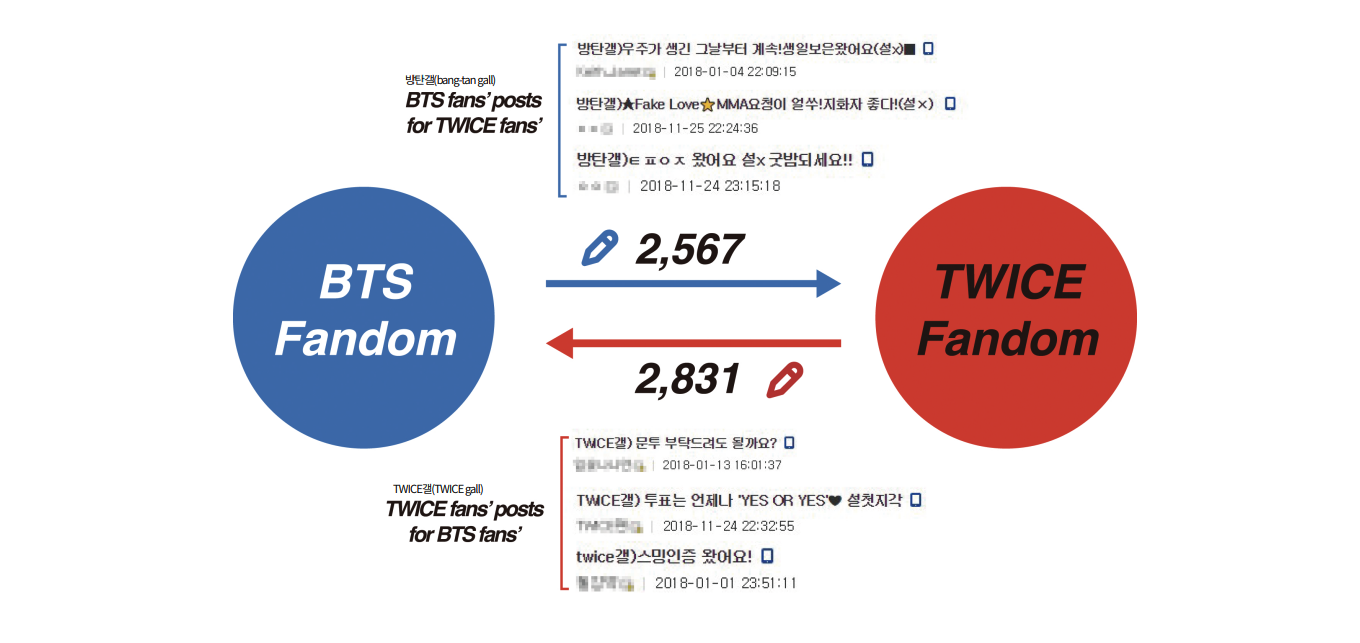

## Fandom Collaborate Network
- 디씨인사이드 갤러리에서 K-POP 팬덤 데이터 수집
- 각 팬덤을 노드로, 팬덤 간 상호작용을 엣지로 한 Fandom Collaborate Network 구축.
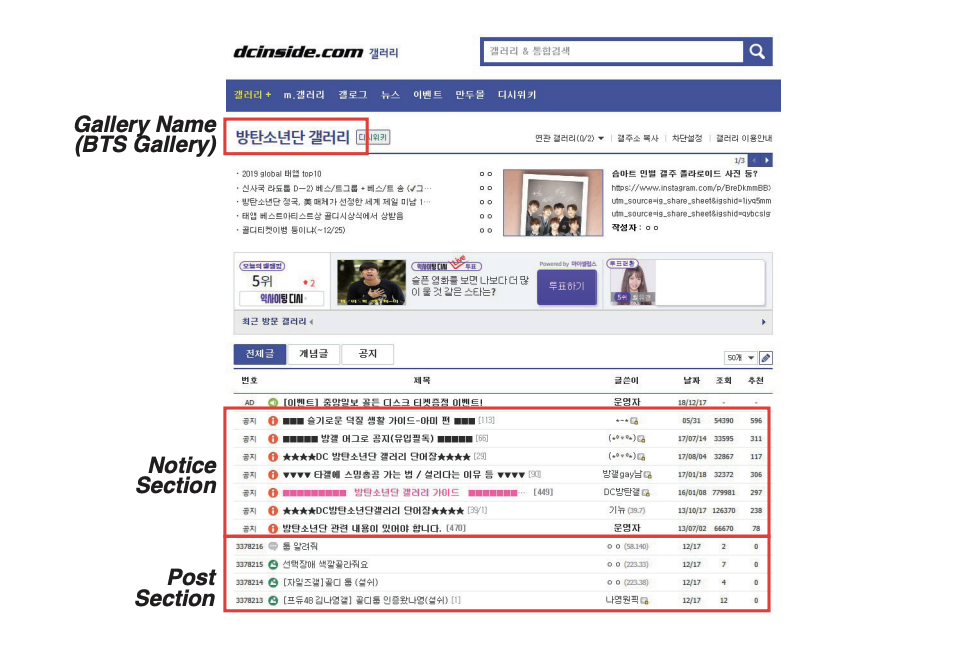

## Graph Visualization with Gephi
- 수집한 데이터를 기반으로, fandom collaboration graph 구축
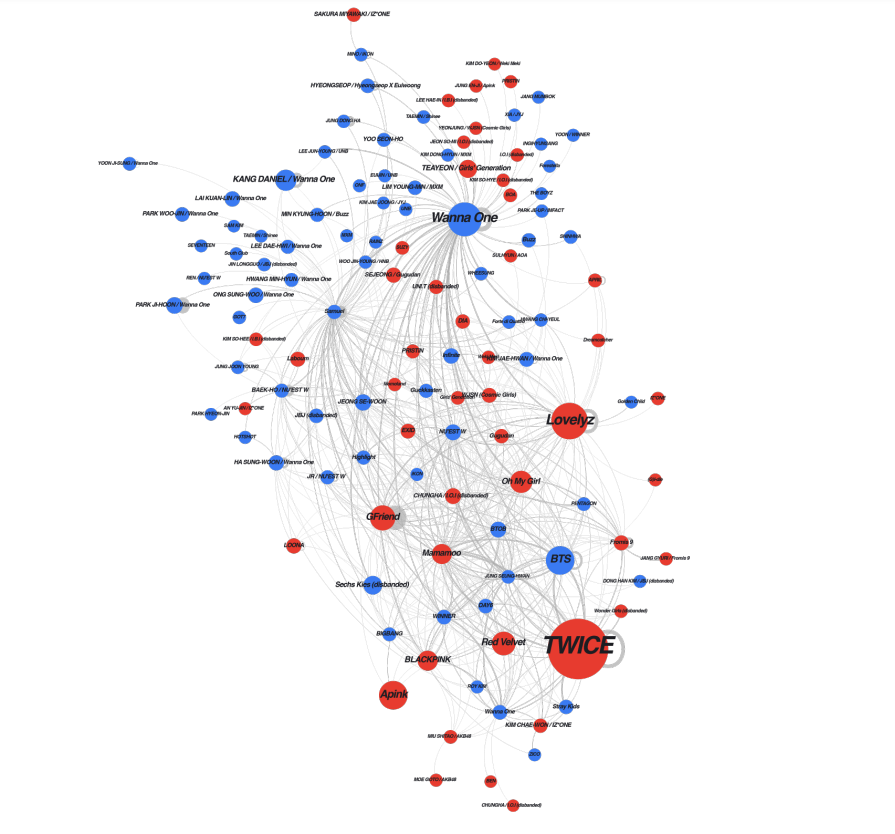

## Research Question
1. K-POP에서 얼마나 Fandom간 Collaboration이 활발히 일어나는가?
2. 보다 활발히 활동하는 Fandom이 협력에도 더 많이 참여하는가?
3. Fandom 간의 협력이 상호적으로 일어나는가 그렇지 않은가?

> 이러한 분석 결과는 K-POP 팬덤들 뿐만 아니라, agency, artist, maketer 등 다양한 K-POP 관련 종사자들에게 좋은 인사이트로 활용될 수 있음.

---

# 1. Environment Setting

In [101]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

---

# 2. Load Dataset

### [Node] : K-POP 팬덤 266개

In [102]:
nodes = pd.read_csv('/content/drive/MyDrive/SKKU3-2_DM/HW2/fandom_nodes.csv', index_col='fandom_id')
nodes

,fandom_name,jan_post,feb_post,type
fandom_id,,,,
000115sh,KIM SU-HYUN : 김수현(미스틱),1547,249,0
19980917,KIM DONG-HYUN / MXM : 김동현,3869,2853,1
2PM,2PM,1787,355,1
6kies,SECHSKIES : 젝스키스,49116,23535,1
Jessica,JESSICA : 제시카,1091,546,0
...,...,...,...,...
yoonjo,YOON JO / UNI.T : 윤조,1555,1358,0
yooyeonjung,YEONJUNG / WJSN (Cosmic Girls) : 유연정,4059,2670,0
youjung,CHOI YOOJUNG / Weki Meki : 최유정,9914,9340,0


- fandom_id: 팬덤의 노드이름
- fandom_name: 팬덤  이름
- jan_post:  1월 팬  커뮤니티 내 게시글 수(도움을 위한 게시글 제외)
- feb_post:  2월 팬  커뮤니티 내 게시글 수(도움을 위한 게시글 제외)
- type : group type (boy, girl)

### [Edge] K-pop 팬덤 간의 협력 (25,903개)

In [103]:
edges = pd.read_csv('/content/drive/MyDrive/SKKU3-2_DM/HW2/fandom_edges.csv')
edges

,source,target,jan_support,feb_support
0,000115sh,000115sh,0,1
1,000115sh,Jessica,15,0
2,000115sh,ahnhyungsub,30,1
3,000115sh,bigjaejun,13,0
4,000115sh,binhjleehjh,29,1
...,...,...,...,...
25898,yuseonho,yoonjisung,39,0
25899,yuseonho,yuseonho,62,32
25900,zico,fromis,1,0
25901,zico,kimsohee,1,0


- source: source node
- target: taget node
- jan_support: 1월 도움 횟수
- feb_support:  2월 도움 횟수

---

# 3. Fandom Collaborate Graph [10점]
- G = (V, E, W) (directed / weighted) 그래프 생성.
- Node는 팬덤, Edge 는 한 팬덤이 다른 팬덤으로 도움을 주는 경우에 해당.
- Weight는 source 팬덤이 target 팬덤에게 도움을 준 횟수 (posting 개수)를 나타냄.

In [104]:
# Total Support (팬덤사이의 전체 도움 횟수) = 1월 도움 + 2월 도움
edges['total_support'] = edges['jan_support'] + edges['feb_support']
edges

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


In [105]:
# edge 쌍 리스트
edge_list = edges.loc[:, ('source', 'target')].values.tolist()
edge_list[:5]

[['000115sh', '000115sh'],
 ['000115sh', 'Jessica'],
 ['000115sh', 'ahnhyungsub'],
 ['000115sh', 'bigjaejun'],
 ['000115sh', 'binhjleehjh']]

In [106]:
# Define Directed Graph
#-----your code-----#
graph = nx.DiGraph()
# 엣지 추가
graph.add_edges_from(edge_list)

#-----valid-----#
graph.number_of_edges(), graph.number_of_nodes()

(25903, 252)

In [107]:
# Add weight
#-----your code-----#

edges_weight = []
for _, row in edges.iterrows():
    source = row['source']
    target = row['target']
    total_support = row['total_support']
    edges_weight.append([source, target, total_support])


#-----valid-----#
edges_weight

[['000115sh', '000115sh', 1],
 ['000115sh', 'Jessica', 15],
 ['000115sh', 'ahnhyungsub', 31],
 ['000115sh', 'bigjaejun', 13],
 ['000115sh', 'binhjleehjh', 30],
 ['000115sh', 'buzz', 3],
 ['000115sh', 'cmg', 18],
 ['000115sh', 'cosmicgirl', 12],
 ['000115sh', 'daewon', 4],
 ['000115sh', 'dmlwlsska', 13],
 ['000115sh', 'doitamazing7', 1],
 ['000115sh', 'dongho', 11],
 ['000115sh', 'feeldog', 5],
 ['000115sh', 'fortediquattro', 16],
 ['000115sh', 'fromis', 1],
 ['000115sh', 'girllaboum', 49],
 ['000115sh', 'gooddayjiwon', 25],
 ['000115sh', 'guckkasten', 29],
 ['000115sh', 'gunmin', 44],
 ['000115sh', 'gx9', 1],
 ['000115sh', 'hby', 3],
 ['000115sh', 'hotshot', 5],
 ['000115sh', 'imfactaeho', 28],
 ['000115sh', 'imhangyeol', 8],
 ['000115sh', 'jaejoong', 73],
 ['000115sh', 'jbj', 52],
 ['000115sh', 'jdh', 28],
 ['000115sh', 'jihansol', 18],
 ['000115sh', 'jinseongho', 11],
 ['000115sh', 'jjp', 7],
 ['000115sh', 'jongshin', 2],
 ['000115sh', 'joohaknyeon', 2],
 ['000115sh', 'jsh', 14],
 ['

In [108]:
graph.add_weighted_edges_from(edges_weight)

In [109]:
# Check
for i, edata in enumerate(graph.edges(data=True)):
    print(i, edata)
    break

0 ('000115sh', '000115sh', {'weight': 1})


---

# 4. K-POP 팬덤 분석

## `Q1. K-POP 팬덤 내 팬덤 협력이 얼마나 활발한가, 또 어느 팬덤에서 활발한가?`

### a. K-POP 팬덤 내 협력이 얼마나 활발한가? [10점]
- 팬덤사이의 전체 도움 수 / 전체 팬덤들의 전체 활동 수

In [110]:
# total_support (팬덤사이의 도움 횟수) = 1월 협력 + 2월 협력
edges

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


In [111]:
 #-----your code-----#
nodes['total_post'] = nodes['jan_post'] + nodes['feb_post']
nodes

,fandom_name,jan_post,feb_post,type,total_post
fandom_id,,,,,
000115sh,KIM SU-HYUN : 김수현(미스틱),1547,249,0,1796
19980917,KIM DONG-HYUN / MXM : 김동현,3869,2853,1,6722
2PM,2PM,1787,355,1,2142
6kies,SECHSKIES : 젝스키스,49116,23535,1,72651
Jessica,JESSICA : 제시카,1091,546,0,1637
...,...,...,...,...,...
yoonjo,YOON JO / UNI.T : 윤조,1555,1358,0,2913
yooyeonjung,YEONJUNG / WJSN (Cosmic Girls) : 유연정,4059,2670,0,6729
youjung,CHOI YOOJUNG / Weki Meki : 최유정,9914,9340,0,19254


In [112]:
# 전체 팬덤의 도움 횟수
#-----your code-----#
total_support = edges['total_support'].sum()

In [113]:
# 전체 팬덤의 활동 횟수
#-----your code-----#
total_post = nodes['total_post'].sum()

In [114]:
print("전체 팬덤 활동 수 대비 팬덤 도움 수 : {:.2f} ".format(total_support / total_post))

전체 팬덤 활동 수 대비 팬덤 도움 수 : 0.21 


> 분석 결과 : 전체 게시글 중 약 21% 정도의 게시글이 팬덤 간 도움과 관련된 글이었음을 보았을 때, K-POP 내 팬덤간 협력이 적극적으로 이루어지고 있음을 알 수 있음.

### b. 어떤 팬덤에서 협력이 활발하게 이루어지고 있는가? [10점]

In [115]:
edges

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


### 협력을 주는 팬덤 기준 (source)
- hint : groupby 함수를 적절히 활용

In [116]:
# total support가 가장 많은 top-10 fandom
 #-----your code-----#
import pandas as pd



# "source" 열을 기준으로 그룹화하고 여러 열에 대한 집계 함수를 적용합니다.
top10_supporting = edges.groupby('source').agg({

    'jan_support': 'sum',
    'feb_support': 'sum',
    'total_support': 'sum',

})

top10_supporting= top10_supporting.sort_values(by='total_support', ascending=False)
top10_supporting=top10_supporting.head(10)

print(top10_supporting)



             jan_support  feb_support  total_support
source                                              
kim                10341         6079          16420
jbj                10340         4673          15013
girllaboum          7952         4144          12096
ohmygirl            9519         2282          11801
leejunyoung         7607         4131          11738
chungha             8190         3419          11609
woojinyoung        10022         1482          11504
highlight           4488         6514          11002
infinite            6239         4555          10794
leesoomin           9582         1206          10788


In [117]:
# nodes 컬럼과 inner join 한 뒤, 내림차순 정렬
top10_supporting.reset_index(inplace=True)

join= pd.merge(top10_supporting,nodes,left_on='source',right_on='fandom_id')
join = join.set_index('source')

join.sort_values('total_support', ascending=False)[['fandom_name', 'total_support']]


,fandom_name,total_support
source,,
kim,Samuel / Samuel : 김사무엘,16420
jbj,JBJ,15013
girllaboum,Laboum : 라붐,12096
ohmygirl,Oh My Girl : 오마이걸,11801
leejunyoung,LEE JUN-YOUNG / UNB : 이준영,11738
chungha,CHUNGHA / I.O.I : 김청하,11609
woojinyoung,WOO JIN-YOUNG / HNB : 우진영,11504
highlight,Highlight : 하이라이트,11002
infinite,Infinite : 인피니트,10794


### 협력을 받는 팬덤 기준 (target)

In [118]:
import pandas as pd



# "source" 열을 기준으로 그룹화하고 여러 열에 대한 집계 함수를 적용합니다.
top10_supported = edges.groupby('target').agg({

    'jan_support': 'sum',
    'feb_support': 'sum',
    'total_support': 'sum',

})

top10_supported= top10_supported.sort_values(by='total_support', ascending=False)
top10_supported=top10_supported.head(10)


top10_supported

,jan_support,feb_support,total_support
target,,,
kim,13235,9715,22950
jbj,12973,6864,19837
leejunyoung,11506,6667,18173
jungsewoon,9295,5320,14615
leesoomin,11972,2618,14590
dongho,9168,5419,14587
girllaboum,7906,6645,14551
mkyunghoon,8745,4988,13733
ohmygirl,7169,6205,13374


In [119]:
top10_supported.reset_index(inplace=True)

join= pd.merge(top10_supported,nodes,left_on='target',right_on='fandom_id')
join = join.set_index('target')

join.sort_values('total_support', ascending=False)[['fandom_name', 'total_support']]


,fandom_name,total_support
target,,
kim,Samuel / Samuel : 김사무엘,22950
jbj,JBJ,19837
leejunyoung,LEE JUN-YOUNG / UNB : 이준영,18173
jungsewoon,JEONG SE-WOON : 정세운,14615
leesoomin,LEE SOO-MIN : 보컬 이수민,14590
dongho,BAEK-HO / NU'EST W : 강동호 (백호),14587
girllaboum,Laboum : 라붐,14551
mkyunghoon,MIN KYUNG-HOON / Buzz : 민경훈,13733
ohmygirl,Oh My Girl : 오마이걸,13374


---

##  `Q2. 보다 활발히 활동하는 Fandom이 협력에도 더 많이 참여하는가? [10점]`
- 각 팬덤의 전체 활동량과 도움과 관련된 활동량이 비례하는지 알아보자. (상관계수 활용)

In [120]:
# Source/Target 별로 groupby
total_supporting = edges.groupby('source').sum()['total_support'] # 각 팬덤별 도움을 준 횟수
total_supporting

<ipython-input-120-52778c683704>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_supporting = edges.groupby('source').sum()['total_support'] # 각 팬덤별 도움을 준 횟수


source
000115sh       1530
19980917       2312
2PM            2007
6kies          4674
Jessica        1175
               ... 
yoonjo         2146
yooyeonjung    3525
youjung        2003
yuseonho       3589
zico              3
Name: total_support, Length: 245, dtype: int64

In [121]:
total_supported = edges.groupby('target').sum()['total_support'] # 각 팬덤별 도움을 받은 횟수
total_supported

<ipython-input-121-9d943017d358>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_supported = edges.groupby('target').sum()['total_support'] # 각 팬덤별 도움을 받은 횟수


target
000115sh       1330
19980917       2012
2PM             353
6kies          5012
Jessica         798
               ... 
yoonjo         1435
yooyeonjung    2250
youjung        4850
yuseonho       6835
zico              1
Name: total_support, Length: 243, dtype: int64

In [122]:
total_supporting.name = 'total_supporting'
total_supported.name = 'total_supported'

In [123]:
total_supporting = pd.DataFrame(total_supporting).join(nodes['total_post'], how='left') # 팬덤별 총 활동 수 정보 추가
total_supported = pd.DataFrame(total_supported).join(nodes['total_post'], how='left') # 팬덤별 총 활동 수 정보 추가

In [124]:
total_supporting

,total_supporting,total_post
source,,
000115sh,1530,1796
19980917,2312,6722
2PM,2007,2142
6kies,4674,72651
Jessica,1175,1637
...,...,...
yoonjo,2146,2913
yooyeonjung,3525,6729
youjung,2003,19254


In [125]:
total_supported

,total_supported,total_post
target,,
000115sh,1330,1796
19980917,2012,6722
2PM,353,2142
6kies,5012,72651
Jessica,798,1637
...,...,...
yoonjo,1435,2913
yooyeonjung,2250,6729
youjung,4850,19254


### Spearman rank correlation

In [126]:
import pandas as pd
from scipy.stats import spearmanr

# 데이터를 DataFrame으로 만들기
data = {
    'total_supporting': total_supporting['total_supporting'],  # 데이터를 입력해야 함
    'total_post': total_supporting['total_post']  # 데이터를 입력해야 함
}

# DataFrame 생성
df = pd.DataFrame(data)

# 두 열 간의 Spearman 순위 상관계수 계산
spearman_corr1, _ = spearmanr(df['total_supporting'], df['total_post'])
spearman_corr2, _ = spearmanr(df['total_post'], df['total_post'])

# 결과 DataFrame 생성
result_data = {
    'total_post': [spearman_corr1, spearman_corr2]
}

result_df = pd.DataFrame(result_data, index=['total_supporting', 'total_post'])
print(result_df)


                  total_post
total_supporting    0.705741
total_post          1.000000


In [127]:
import pandas as pd
from scipy.stats import spearmanr

# 데이터를 DataFrame으로 만들기
data = {
    'total_supported': total_supported['total_supported'],  # 데이터를 입력해야 함
    'total_post': total_supported['total_post']  # 데이터를 입력해야 함
}

# DataFrame 생성
df = pd.DataFrame(data)

# 두 열 간의 Spearman 순위 상관계수 계산
spearman_corr1, _ = spearmanr(df['total_supported'], df['total_post'])
spearman_corr2, _ = spearmanr(df['total_post'], df['total_post'])

# 결과 DataFrame 생성
result_data = {
    'total_post': [spearman_corr1, spearman_corr2]
}

result_df = pd.DataFrame(result_data, index=['total_supported', 'total_post'])
print(result_df)


                 total_post
total_supported    0.567979
total_post         1.000000


> 분석 결과 : 스피어만 상관 계수 측정 결과, 도움을 주는 팬덤 및 도움을 받는 팬덤을 기준으로 각각 0.70, 0.56으로 나온 것으로 보아 active 팬덤이 팬덤 간 collaboration도 활발한 것을 알 수 있음.

---

## `Q3. Fandom 간의 협력이 상호적으로 발생하는가(reciprocal) 그렇지 않은가? [20점]`
- in-degree와 out-degree 활용 (in-degree: 내가 supporting하는 팬덤, out-degree: 나를 supporting하는 팬덤)

### Degree

In [128]:
# 각 팬덤 노드를 supporting하는 팬덤 수
graph.in_degree()

InDegreeView({'000115sh': 84, 'Jessica': 66, 'ahnhyungsub': 166, 'bigjaejun': 138, 'binhjleehjh': 166, 'buzz': 161, 'cmg': 151, 'cosmicgirl': 135, 'daewon': 88, 'dmlwlsska': 204, 'doitamazing7': 183, 'dongho': 133, 'feeldog': 172, 'fortediquattro': 152, 'fromis': 209, 'girllaboum': 190, 'gooddayjiwon': 123, 'guckkasten': 88, 'gunmin': 138, 'gx9': 148, 'hby': 111, 'hotshot': 182, 'imfactaeho': 150, 'imhangyeol': 139, 'jaejoong': 59, 'jbj': 183, 'jdh': 174, 'jihansol': 150, 'jinseongho': 170, 'jjp': 13, 'jongshin': 45, 'joohaknyeon': 57, 'jsh': 147, 'jungchaeyeon': 180, 'junsu': 132, 'kantoz': 118, 'kim': 201, 'kimbowon': 147, 'kimbyunggwan': 132, 'kimhyojin': 108, 'kimsejeong': 155, 'kimseyun': 171, 'kimsohee': 195, 'kimtaemin': 125, 'leedonghun': 147, 'leehyunjoo': 191, 'leejungha': 155, 'leejunyoung': 202, 'leesoomin': 206, 'matilda': 93, 'mino0330': 130, 'mkyunghoon': 178, 'mxmymdh': 40, 'namyujin': 174, 'nojisun': 125, 'ohmygirl': 186, 'onf': 166, 'paka': 118, 'parkhyeonjin': 154, '

In [129]:
# 각 팬덤 노드에서 supporting하는 팬덤 수
graph.out_degree()

OutDegreeView({'000115sh': 82, 'Jessica': 64, 'ahnhyungsub': 145, 'bigjaejun': 127, 'binhjleehjh': 166, 'buzz': 178, 'cmg': 137, 'cosmicgirl': 186, 'daewon': 74, 'dmlwlsska': 184, 'doitamazing7': 190, 'dongho': 140, 'feeldog': 169, 'fortediquattro': 100, 'fromis': 0, 'girllaboum': 185, 'gooddayjiwon': 126, 'guckkasten': 99, 'gunmin': 128, 'gx9': 189, 'hby': 101, 'hotshot': 169, 'imfactaeho': 142, 'imhangyeol': 125, 'jaejoong': 81, 'jbj': 203, 'jdh': 144, 'jihansol': 136, 'jinseongho': 171, 'jjp': 11, 'jongshin': 64, 'joohaknyeon': 78, 'jsh': 180, 'jungchaeyeon': 147, 'junsu': 131, 'kantoz': 116, 'kim': 205, 'kimbowon': 138, 'kimbyunggwan': 143, 'kimhyojin': 83, 'kimsejeong': 150, 'kimseyun': 161, 'kimsohee': 188, 'kimtaemin': 65, 'leedonghun': 146, 'leehyunjoo': 159, 'leejungha': 109, 'leejunyoung': 193, 'leesoomin': 198, 'matilda': 0, 'mino0330': 131, 'mkyunghoon': 175, 'mxmymdh': 190, 'namyujin': 166, 'nojisun': 93, 'ohmygirl': 205, 'onf': 145, 'paka': 126, 'parkhyeonjin': 161, 'park

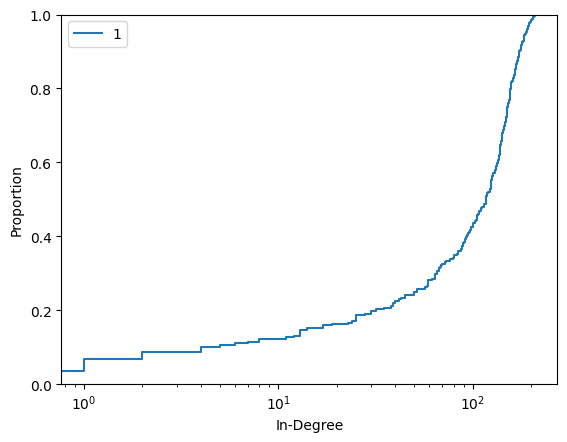

In [130]:
sns.ecdfplot(graph.in_degree())
plt.xscale('log')
plt.xlabel('In-Degree')
plt.ylabel('Proportion')
plt.show()
plt.close()

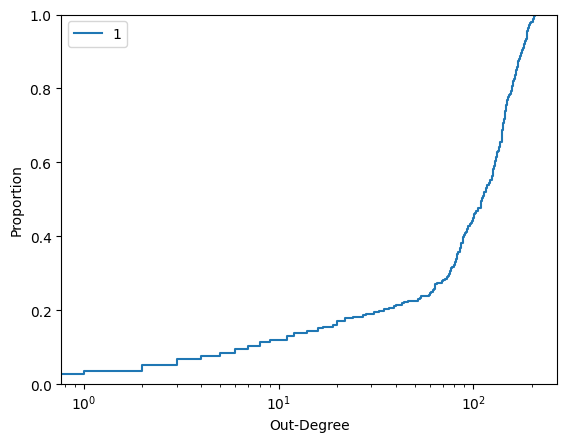

In [131]:
sns.ecdfplot(graph.out_degree())
plt.xscale('log')
plt.xlabel('Out-Degree')
plt.ylabel('Proportion')
plt.show()
plt.close()

### #of posting

In [132]:
edges

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


In [133]:
supported = edges.groupby('target').sum()['total_support'] # 각 팬덤별 도움을 받은 횟수
supporting = edges.groupby('source').sum()['total_support'] # 각 팬덤별 도움을 준 횟수

<ipython-input-133-38271994962a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  supported = edges.groupby('target').sum()['total_support'] # 각 팬덤별 도움을 받은 횟수
<ipython-input-133-38271994962a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  supporting = edges.groupby('source').sum()['total_support'] # 각 팬덤별 도움을 준 횟수


In [134]:
supported = pd.DataFrame(supported).rename(columns={'total_support': 'supported'})
supporting = pd.DataFrame(supporting).rename(columns={'total_support': 'supporting'})

In [135]:
# join (supported + supporting)
supported.reset_index(inplace=True)

post = pd.merge(supporting,supported,left_on='source',right_on='target')
post = post.set_index('target')
post

,supporting,supported
target,,
000115sh,1530,1330
19980917,2312,2012
2PM,2007,353
6kies,4674,5012
Jessica,1175,798
...,...,...
yoonjo,2146,1435
yooyeonjung,3525,2250
youjung,2003,4850


### Ratio

In [136]:
# ratio : supported / supporting
post['ratio'] =  post['supported'] / post['supporting']

In [137]:
post

,supporting,supported,ratio
target,,,
000115sh,1530,1330,0.869281
19980917,2312,2012,0.870242
2PM,2007,353,0.175884
6kies,4674,5012,1.072315
Jessica,1175,798,0.679149
...,...,...,...
yoonjo,2146,1435,0.668686
yooyeonjung,3525,2250,0.638298
youjung,2003,4850,2.421368


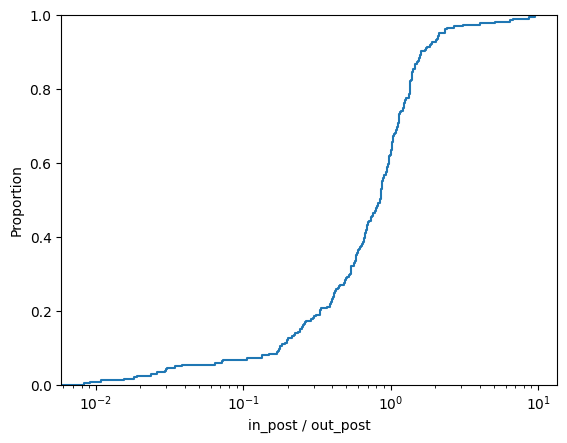

In [138]:
sns.ecdfplot(post['ratio'])
plt.xscale('log')
plt.xlabel('in_post / out_post')
plt.ylabel('Proportion')
plt.show()
plt.close()

- ratio가 1일 때, 협력을 준 만큼 협력을 받은 것.
- ratio가 1보다 작을 때, 협력을 준 만큼 협력을 받지 못한 것.
- ratio가 1보다 클 때, 협력을 준 것보다 더 많은 협력을 받은 것.

> 분석 결과 : 0.6만큼의 ratio 1보다 작으므로 협력 준만큼 협력을 받지 못함을 알 수 있다.

---

# 5. K-POP Fandom 그래프 시각화
- K-POP 팬덤 그래프를 시각화하기에 알맞은 형태로 바꾼 후 Gephi를 이용해 시각화 해볼 것

## `1. Edge Filtering [10점]`

- 원활한 시각화를 위해 의미 있는 edge 만 포함하고 나머지는 지우시오.
- 이를 위해 weight 기준으로 상위 1%에 해당되는 edge만 남기고 나머지 edge는 제거할 것.

- 다음 numpy의 percentile 함수를 활용하여 계산할 것.  
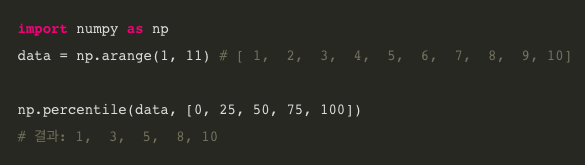

In [139]:
import numpy as np
data=edges['total_support']

print("Total edges = ", np.percentile(data,99)) # 백분위 99%에 해당되는 엣지 값 출력.

Total edges =  198.0


In [140]:
# edge weight (total support) 기준 상위 1퍼센트에 해당되는 엣지만 필터링한 리스트
#----your code----#
import numpy as np

# 데이터프레임에서 'feb_support' 열의 값을 추출
weights = edges['total_support'].values

# 상위 1%에 해당하는 weight 값의 임계치를 계산
threshold = np.percentile(weights, 99)

# 임계치 이상의 weight를 가진 edge만 필터링
filtered = edges[edges['total_support'] >= threshold]

# 결과를 출력합니다


filtered

,source,target,jan_support,feb_support,total_support
281,6kies,6kies,48,231,279
744,ahnhyungsub,ahnhyungsub,269,205,474
791,ahnhyungsub,jbj,128,122,250
917,aoa,gf,225,0,225
954,aoa,kimjaehwan,249,0,249
...,...,...,...,...,...
24893,woojinyoung,nebula,199,16,215
24946,woojinyoung,wannaone,155,45,200
24947,woojinyoung,wartortle,267,31,298
24951,woojinyoung,winkgall,332,23,355


In [141]:
edge_list = filtered.loc[:, ('source', 'target', 'total_support')]
print("Total edges size = ", edge_list.shape)

Total edges size =  (263, 3)


In [142]:
# Check
edge_list

,source,target,total_support
281,6kies,6kies,279
744,ahnhyungsub,ahnhyungsub,474
791,ahnhyungsub,jbj,250
917,aoa,gf,225
954,aoa,kimjaehwan,249
...,...,...,...
24893,woojinyoung,nebula,215
24946,woojinyoung,wannaone,200
24947,woojinyoung,wartortle,298
24951,woojinyoung,winkgall,355


## `2. 그래프 정의 및 저장 [10점]`

- K-POP Fandom Collaboration Graph 정의
    - directed / weighted
    - Node : Fandom
    - Edge : Fandom 간 상호작용
    - Weight : Weight는 source 팬덤이 target 팬덤에게 도움을 준 횟수 (posting 개수)
    
    
- 정의한 그래프를 gephi에서 불러올 수 있는 형태로 저장하시오.

In [143]:
#import pandas as pd

#nodes = pd.read_csv('/content/drive/MyDrive/SKKU3-2_DM/HW2/fandom_nodes.csv', index_col='fandom_id')
#nodes

In [144]:
source = pd.merge(edge_list['source'], nodes, left_on='source', right_on='fandom_id', how='inner')

print(source)

          source                               fandom_name  jan_post  \
0          6kies                          SECHSKIES : 젝스키스     49116   
1    ahnhyungsub  HYEONGSEOP / Hyeongseop X Euiwoong : 안형섭      9233   
2    ahnhyungsub  HYEONGSEOP / Hyeongseop X Euiwoong : 안형섭      9233   
3            aoa                                       AOA      8936   
4            aoa                                       AOA      8936   
..           ...                                       ...       ...   
258  woojinyoung                 WOO JIN-YOUNG / HNB : 우진영     12897   
259  woojinyoung                 WOO JIN-YOUNG / HNB : 우진영     12897   
260  woojinyoung                 WOO JIN-YOUNG / HNB : 우진영     12897   
261  woojinyoung                 WOO JIN-YOUNG / HNB : 우진영     12897   
262   yoonjisung            YOON JI-SUNG / Wanna One : 윤지성      7237   

     feb_post  type  total_post  
0       23535     1       72651  
1        4933     1       14166  
2        4933     1       14166  

In [145]:
target= pd.merge(edge_list['target'], nodes, left_on='target', right_on='fandom_id', how='inner')
print(target)

          target                               fandom_name  jan_post  \
0          6kies                          SECHSKIES : 젝스키스     49116   
1    ahnhyungsub  HYEONGSEOP / Hyeongseop X Euiwoong : 안형섭      9233   
2    ahnhyungsub  HYEONGSEOP / Hyeongseop X Euiwoong : 안형섭      9233   
3            jbj                                       JBJ     31905   
4            jbj                                       JBJ     31905   
..           ...                                       ...       ...   
258        twice                                     TWICE    226921   
259        twice                                     TWICE    226921   
260        twice                                     TWICE    226921   
261        twice                                     TWICE    226921   
262   parkwoojin            PARK WOO-JIN / Wanna One : 박우진     11399   

     feb_post  type  total_post  
0       23535     1       72651  
1        4933     1       14166  
2        4933     1       14166  

In [146]:
# 노드 목록 확인
nodes_list = list(graph.nodes)
print(nodes_list)
# Directed Graph
#-----your code-----#

graph = nx.DiGraph()
# 엣지 추가
graph.add_edges_from(edge_list.loc[:, ('source', 'target')].values.tolist())
graph.number_of_nodes(), graph.number_of_edges()

['000115sh', 'Jessica', 'ahnhyungsub', 'bigjaejun', 'binhjleehjh', 'buzz', 'cmg', 'cosmicgirl', 'daewon', 'dmlwlsska', 'doitamazing7', 'dongho', 'feeldog', 'fortediquattro', 'fromis', 'girllaboum', 'gooddayjiwon', 'guckkasten', 'gunmin', 'gx9', 'hby', 'hotshot', 'imfactaeho', 'imhangyeol', 'jaejoong', 'jbj', 'jdh', 'jihansol', 'jinseongho', 'jjp', 'jongshin', 'joohaknyeon', 'jsh', 'jungchaeyeon', 'junsu', 'kantoz', 'kim', 'kimbowon', 'kimbyunggwan', 'kimhyojin', 'kimsejeong', 'kimseyun', 'kimsohee', 'kimtaemin', 'leedonghun', 'leehyunjoo', 'leejungha', 'leejunyoung', 'leesoomin', 'matilda', 'mino0330', 'mkyunghoon', 'mxmymdh', 'namyujin', 'nojisun', 'ohmygirl', 'onf', 'paka', 'parkhyeonjin', 'parkjeup', 'pentagon', 'pledis', 'rainz', 'rbwdongmyeong', 'romeo', 'romeohyunkyung', 'ses', 'shyunkim', 'sonamoo', 'soojin', 'taemin', 'tbz1206', 'theboyz', 'thfl1', 'tj3579', 'toppdogg', 'wannaone', 'winner', 'woojinyoung', 'yangjiwon', 'yoonjo', 'yooyeonjung', '19980917', '6kies', 'ace5', 'acej

(84, 263)

In [158]:
#노드에 type 속성 추가

#source노드
for index, row in source.iterrows():

    graph.add_node(row['source'],
                   total_post=row['total_post'],
              type=row['type'])

#target노드
for index, row in target.iterrows():

    graph.add_node(row['target'],
                   total_post=row['total_post'],

              type=row['type'])


In [159]:
# Add weight
#-----your code-----#

edges_weight = []
edges_weight = [(edge[0], edge[1], weight) for edge, weight in zip(edge_list.loc[:, ('source', 'target')].values.tolist(), edge_list['total_support'].values)]
graph.add_weighted_edges_from(edges_weight)
#-----valid-----#
edges_weight

[('6kies', '6kies', 279),
 ('ahnhyungsub', 'ahnhyungsub', 474),
 ('ahnhyungsub', 'jbj', 250),
 ('aoa', 'gf', 225),
 ('aoa', 'kimjaehwan', 249),
 ('april', 'april', 510),
 ('april', 'dongho', 205),
 ('april', 'ohmygirl', 295),
 ('b1a4', 'kim', 221),
 ('binhjleehjh', 'dongho', 226),
 ('blackpink', 'chungha', 200),
 ('blackpink', 'dongho', 258),
 ('blackpink', 'jbj', 221),
 ('blockb', 'jbj', 228),
 ('boa', 'dongho', 216),
 ('boa', 'jbj', 230),
 ('btob', 'btob', 481),
 ('bts', 'jbj', 202),
 ('buzz', 'mkyunghoon', 254),
 ('chungha', 'gf', 238),
 ('chungha', 'jungsewoon', 298),
 ('chungha', 'kdani', 231),
 ('chungha', 'leejunyoung', 212),
 ('chungha', 'mamamoo', 279),
 ('chungha', 'nebula', 218),
 ('chungha', 'wannaone', 219),
 ('chungha', 'wartortle', 199),
 ('chungha', 'youjung', 235),
 ('cmg', 'jbj', 210),
 ('cmg', 'jinseongho', 247),
 ('cosmicgirl', 'chungha', 216),
 ('cosmicgirl', 'jungsewoon', 208),
 ('cosmicgirl', 'ohmygirl', 198),
 ('day6', 'jbj', 250),
 ('day6', 'jinseongho', 259),


In [160]:
# Check
for i, edata in enumerate(graph.edges(data=True)):
    print(i, edata)
    break

0 ('6kies', '6kies', {'weight': 279})


In [161]:
nx.write_graphml_lxml(graph, "hw02_graph.graphml")

In [162]:
for node in graph.nodes(data=True):
    print(node)
    break

('6kies', {'total_post': 72651, 'type': 1})


## `3. 그래프 시각화 [20점]`
- 논문에 들어간 그래프와 유사하게 시각화 하시오. (완전히 똑같을 필요 없음)
- 채점 기준
    - layout & template를 조절하시오.
    - 노드 크기를 적절히 조절하시오. (5점)
    - 노드 색상을 적절히 조절하시오. (5점)
    - 노드 텍스트의 크기를 적절히 조절하시오. (5점)
    - 엣지의 색상을 적절히 조절하시오. (5점)

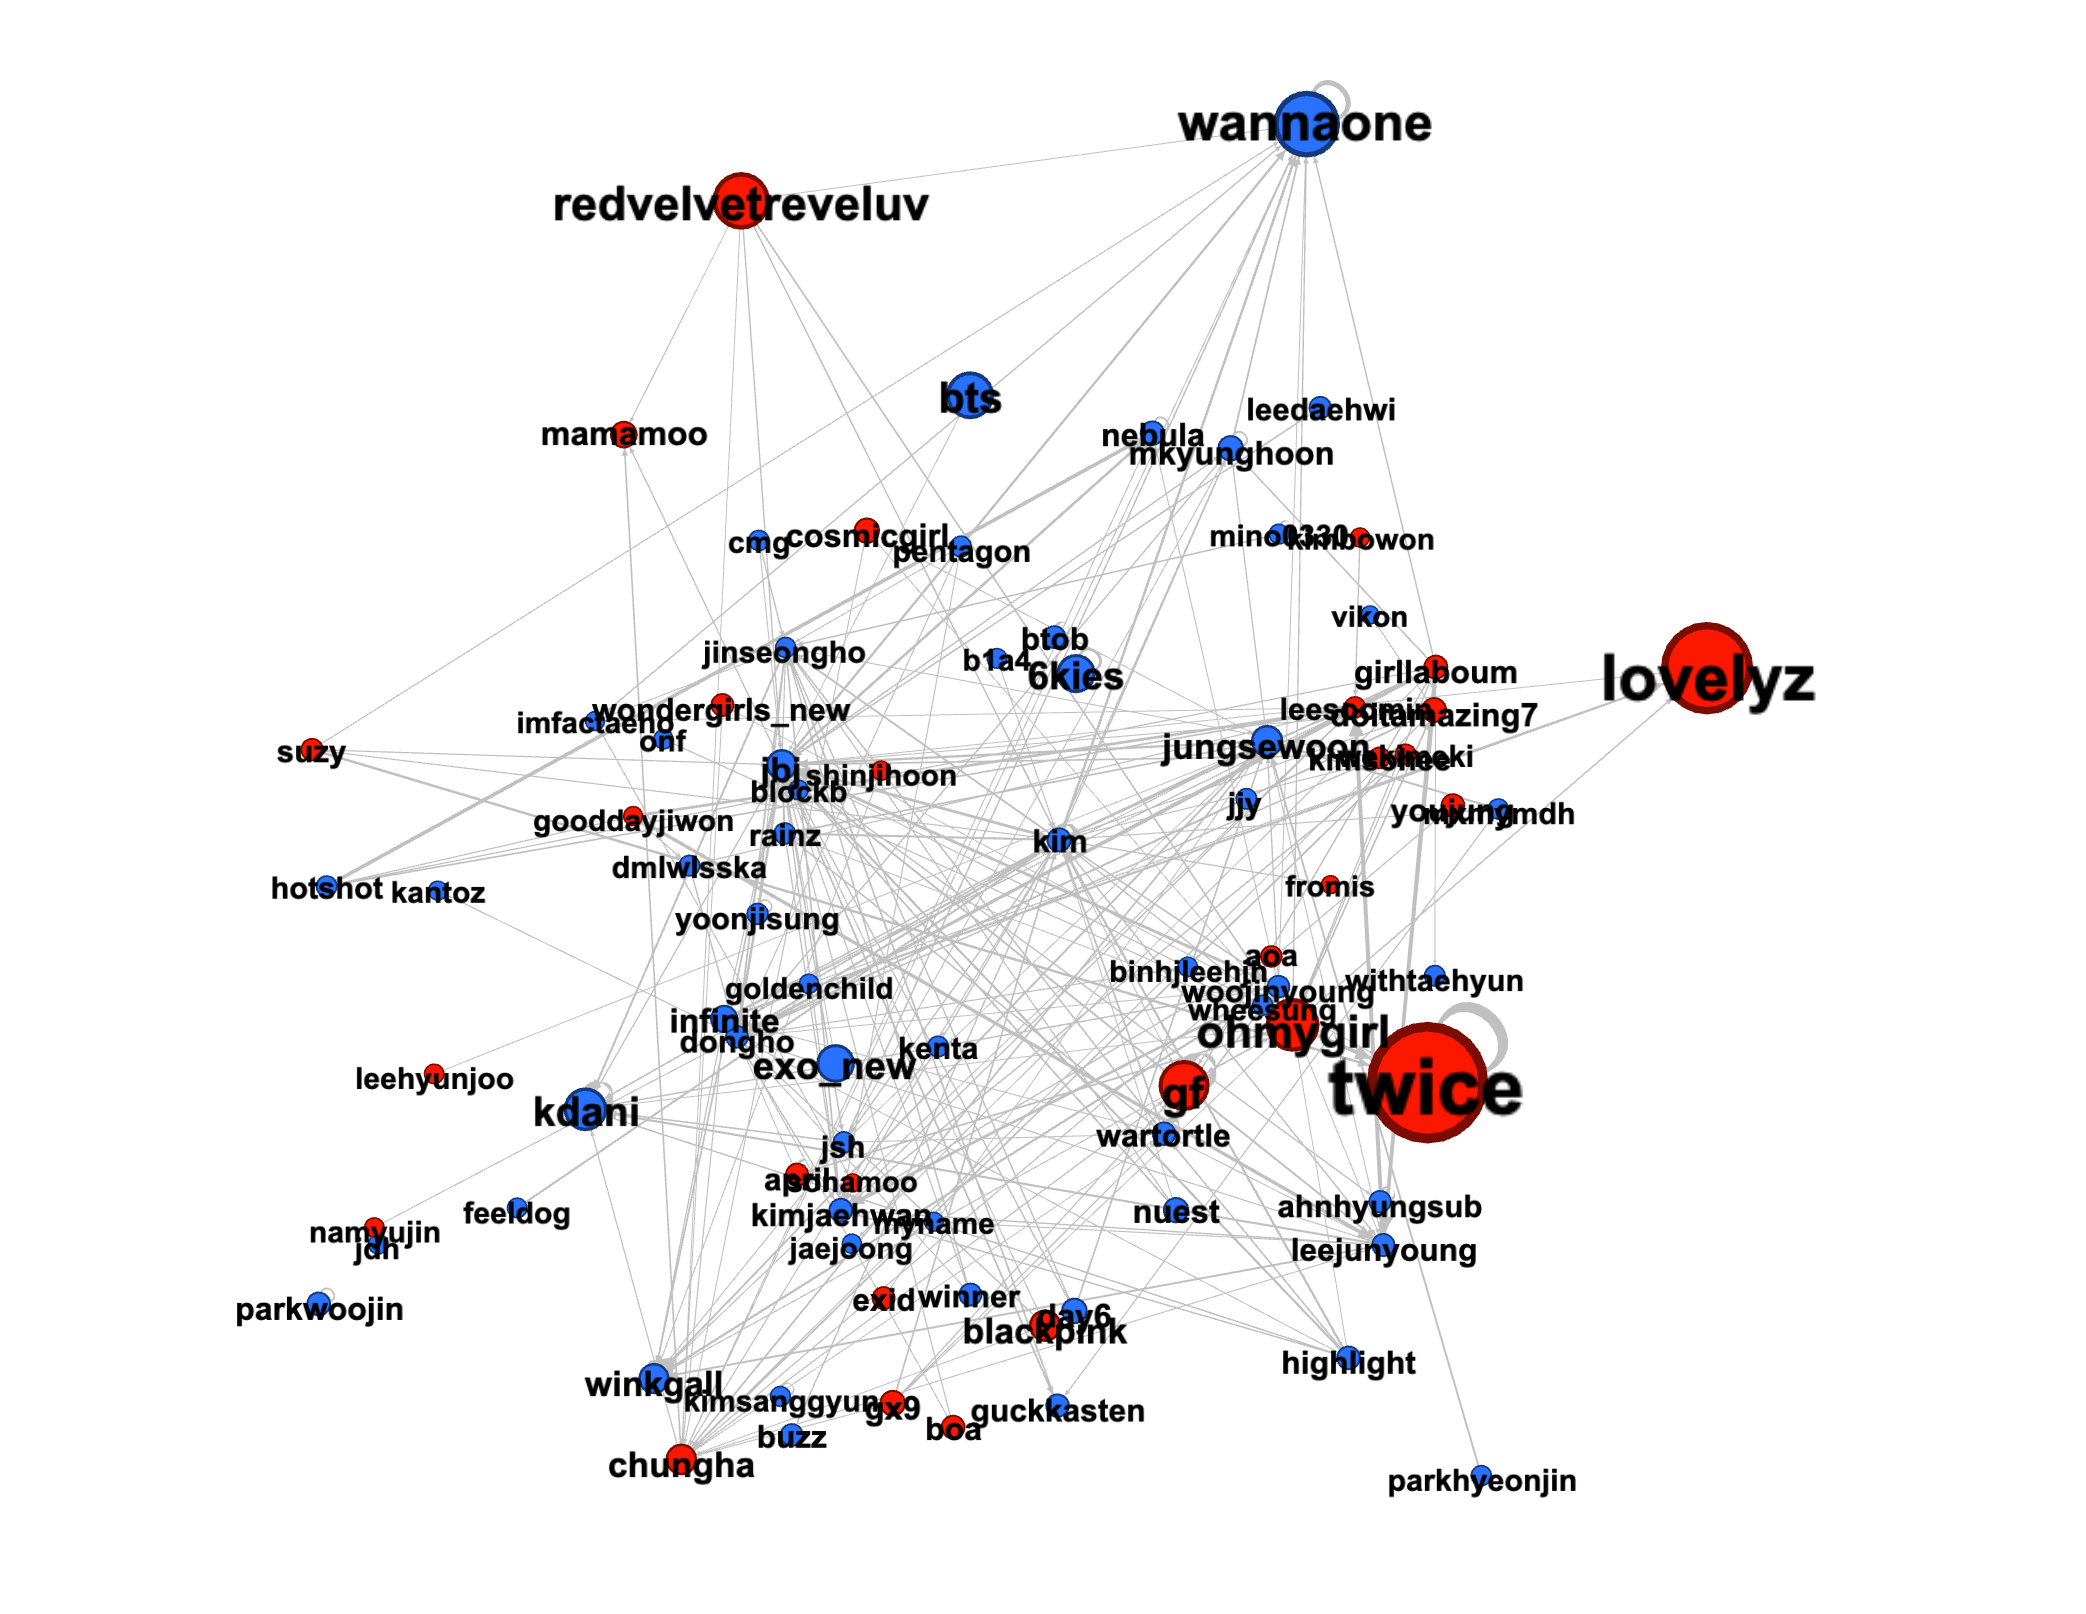- 시각화를 모두 수행한 후, 자신이 정의한 그래프 이미지를 아래 붙여넣으시오.  
답 : [이미지]

---

끝.  
과제 하시느라 고생하셨습니다!